In [2]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shapely
import scipy
from shapely.geometry import Polygon, Point
from shapely import wkt
from sunpy.time import parse_time
from scipy.stats import linregress

In [3]:
flare_set = pd.read_csv('flare_dataset_ef2.csv', delimiter = ',', header = 0)
goes_set = pd.read_csv('prepped_GOES.csv', delimiter = ',', header = 0)
print goes_set.shape[0]

no_ef_flares = flare_set.ix[flare_set['is_ef']==0]
ef_flares = flare_set.ix[flare_set['is_ef']==1]

10894


In [15]:
flareswithgoes = flare_set.ix[flare_set['is_goes']==1]
flareswithsigmoid = flare_set.ix[flare_set['num_associated_sigmoid']!=0]
flareswithgoesandsig = flareswithgoes.ix[flareswithgoes['num_associated_sigmoid']!=0]

In [16]:
def correct_num_digits(x):
    x = str(x)
    if x[0]!='n':
        x = x[1:]
    else: x = 0
    x = int(float(x))
    return x

flareswithgoes_ARcol = map(correct_num_digits, flareswithgoes['ar_noaanum'])
flareswithsig_ARcol = map(correct_num_digits, flareswithsigmoid['ar_noaanum'])

In [26]:
length_goes = len(flareswithgoes_ARcol)
length_sig = len(flareswithsig_ARcol)
num_agree_goes = 0.0
num_agree_sig = 0.0
num_zero_goes = 0.0
num_nonzero_goes = 0.0
num_not_zero_agree_goes = 0.0
num_zero_sig = 0.0
num_nonzero_sig = 0.0
num_not_zero_agree_sig = 0.0
num_agree_goes_and_sig = 0.0
length_goes_and_sig = len(flareswithgoesandsig['goes_noaanum'])

for i, elem in enumerate(flareswithgoes_ARcol):
    if elem == flareswithgoes['goes_noaanum'].values[i]:
        num_agree_goes+=1
    if flareswithgoes['goes_noaanum'].values[i]!=0:
        num_nonzero_goes+=1
        if elem == flareswithgoes['goes_noaanum'].values[i]:
            num_not_zero_agree_goes+=1
        
for i, elem in enumerate(flareswithsig_ARcol):
    if elem == flareswithsigmoid['sigmoid_noaanum'].values[i]:
        num_agree_sig+=1  
    if flareswithsigmoid['sigmoid_noaanum'].values[i]!=0:
        num_nonzero_sig+=1
        if elem == flareswithsigmoid['sigmoid_noaanum'].values[i]:
            num_not_zero_agree_sig+=1
i = 0            
for i in range(length_goes_and_sig):
    if flareswithgoesandsig['goes_noaanum'].values[i] == flareswithgoesandsig['sigmoid_noaanum'].values[i]:
        num_agree_goes_and_sig+=1
        
print num_agree_goes/length_goes
print num_agree_sig/length_sig
print num_not_zero_agree_goes/num_nonzero_goes
print num_not_zero_agree_sig/num_nonzero_sig
print num_agree_goes_and_sig/length_goes_and_sig

0.50135501355
0.397647058824
0.505747126437
0.478260869565
0.30303030303


In [8]:
unique_ef = flare_set.associated_ef.unique()
print len(unique_ef)
unique_goes = flare_set.associated_goes.unique()
print len(unique_goes)
ef_set = pd.read_csv('raw_ef.csv', delimiter = ',', header = 0)
print ef_set.shape[0]
ef_set = ef_set.ix[ef_set['maxmagfieldstrength']>=100]
print ef_set.shape[0]
print ef_flares.shape[0]

2287
348
40882
34753
4264


In [17]:
percentile = [10, 25, 33, 50, 55, 60, 66, 75, 90]
np.percentile(ef_flares['ef_association_strength'], percentile)

array([  8.90764136e-01,   4.75202830e+00,   1.03955250e+01,
         4.67147370e+01,   7.44607451e+01,   1.37480678e+02,
         2.76953013e+02,   1.14880004e+03,   1.62536476e+04])

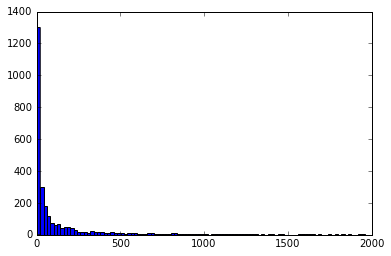

In [18]:
_ = plt.hist(ef_flares['ef_association_strength'], bins = 100, range=(1, 2000))

In [87]:
flare131 = flare_set.ix[flare_set['is_131']==1]
flare131_94 = flare131.ix[flare_set['is_94']==1]
flare131_94_g = flare131_94.ix[flare131_94['is_goes']==1]
print flare131_94_g.shape[0]
flare171 = flare_set.ix[flare_set['is_171']==1]
flare193 = flare_set.ix[flare_set['is_193']==1]
flare211 = flare_set.ix[flare_set['is_211']==1]
flare335 = flare_set.ix[flare_set['is_335']==1]
flare304 = flare_set.ix[flare_set['is_304']==1]
flare94 = flare_set.ix[flare_set['is_94']==1]
flaregoes = flare_set.ix[flare_set['is_goes']==1]

27


In [29]:
print flare131.shape[0]
print flare171.shape[0]
print flare193.shape[0]
print flare335.shape[0]
print flare211.shape[0]
print flare304.shape[0]
print flare94.shape[0]
print flaregoes.shape[0]

4908
5156
3060
669
4081
1426
701
369


In [4]:
flare131 = flare_set.ix[flare_set['is_131']==1]
flare171 = flare131.ix[flare131['is_171']==1]
flare131171 = flare171
flare193 = flare171.ix[flare171['is_193']==1]
flare131171193 = flare193
flare211 = flare193.ix[flare193['is_211']==1]
flare131171193211 = flare211
flare335 = flare211.ix[flare211['is_335']==1]
flare131171193211335 = flare335
flare304 = flare335.ix[flare335['is_304']==1]
flare131171193211335304 = flare304
flare94 = flare304.ix[flare304['is_94']==1]
allAIA = flare94
print allAIA.shape[0]
allflare = allAIA.ix[allAIA['is_goes']==1]
print allflare.shape[0]


275
10


In [5]:
allAIA.to_csv('all_AIA_wavelengths_2.csv', index = False)

In [6]:
good = allAIA.ix[allAIA['is_ef']==1]
print good.shape[0]

201


In [14]:
goes_set['fl_goescls'] = map(str, goes_set['fl_goescls'])
goes_set.loc[:, 'goes_class_letter'] = map(lambda x: x[0], goes_set['fl_goescls'])
X = goes_set.ix[goes_set['goes_class_letter']=='X']
M = goes_set.ix[goes_set['goes_class_letter']=='M']
C = goes_set.ix[goes_set['goes_class_letter']=='C']
B = goes_set.ix[goes_set['goes_class_letter']=='B']
A = goes_set.ix[goes_set['goes_class_letter']=='A']
tot = X.shape[0] +M.shape[0]+C.shape[0]+B.shape[0] +A.shape[0]
print X.shape[0]
print M.shape[0]
print C.shape[0]
print B.shape[0]
print A.shape[0]
print goes_set.shape[0]
print tot

34
601
6357
3892
10
10894
10894


In [31]:
ef_association_60th_percentile = ef_flares.ix[ef_flares['ef_association_strength']>= 137]


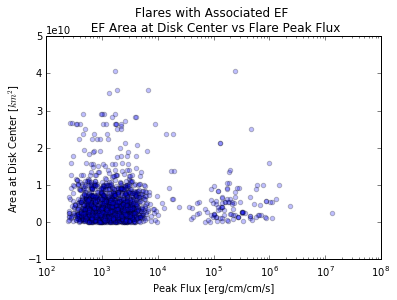

LinregressResult(slope=99360440.284920871, intercept=4152411350.8792844, rvalue=0.029345777476048548, pvalue=0.22558176582138553, stderr=81963144.808981374)


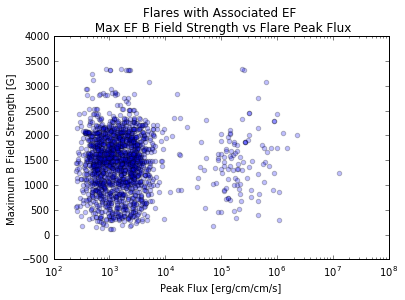

LinregressResult(slope=2.3490125803183495, intercept=1439.1714695203605, rvalue=0.0060060915787970267, pvalue=0.80415972278041015, stderr=9.4716004134191145)


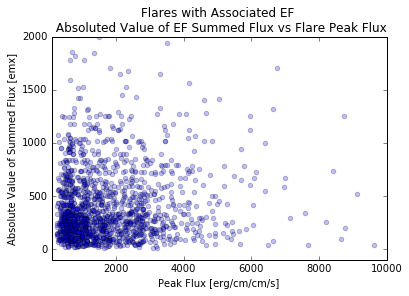

LinregressResult(slope=-104.09458682110731, intercept=1878.7222101510749, rvalue=-0.022724521274236093, pvalue=0.34808180008629364, stderr=110.90702261134045)


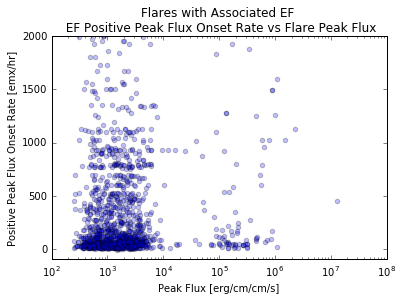

LinregressResult(slope=256.61527133699633, intercept=182.61645599040821, rvalue=0.039797680856836576, pvalue=0.10023364245957266, stderr=156.03367549806174)


In [88]:
abs_sumflux_ef = ef_association_60th_percentile['ef_sumpossignedflux'] -ef_association_60th_percentile['ef_sumnegsignedflux']
peak_flux_ef = ef_association_60th_percentile['sum_peakflux'] + ef_association_60th_percentile['fl_peakflux_goes']
maxmagfieldstrength = ef_association_60th_percentile['maxmagfieldstrength']

pospeakfluxonsetrate = ef_association_60th_percentile['ef_pospeakfluxonsetrate']

area_atdiskcenter = ef_association_60th_percentile['area_atdiskcenter']

peak_flux_ef_log = np.log(peak_flux_ef)

plt.scatter(peak_flux_ef, area_atdiskcenter, alpha = 0.25)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel(r'Area at Disk Center [$km^2$]')
plt.title('Flares with Associated EF \n EF Area at Disk Center vs Flare Peak Flux')
plt.semilogx()

plt.show()

print linregress(peak_flux_ef_log, area_atdiskcenter)



plt.scatter(peak_flux_ef, maxmagfieldstrength, alpha = 0.25)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Maximum B Field Strength [G]')
plt.title('Flares with Associated EF \n Max EF B Field Strength vs Flare Peak Flux')
plt.semilogx()

plt.show()
print linregress(peak_flux_ef_log, maxmagfieldstrength)


_ = plt.scatter(peak_flux_ef, abs_sumflux_ef, alpha = 0.25)
plt.ylim(-100, 2000)
plt.xlim(100, 10000)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Absolute Value of Summed Flux [emx]')
plt.title('Flares with Associated EF \n Absoluted Value of EF Summed Flux vs Flare Peak Flux')
# plt.semilogx()

plt.show()

print linregress(peak_flux_ef_log, abs_sumflux_ef)





_ = plt.scatter(peak_flux_ef, pospeakfluxonsetrate, alpha = 0.25)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Positive Peak Flux Onset Rate [emx/hr]')
_ = plt.title('Flares with Associated EF \n EF Positive Peak Flux Onset Rate vs Flare Peak Flux')
plt.ylim(-100, 2000)
plt.semilogx()

plt.show()

print linregress(peak_flux_ef_log, pospeakfluxonsetrate)


In [78]:
no_ef_flares = flare_set.ix[flare_set['is_ef']==0]
ef_flares = flare_set.ix[flare_set['is_ef']==1]



no_ef_w_ar = no_ef_flares.ix[no_ef_flares['is_ar']==1]
no_ef_wo_ar = no_ef_flares.ix[no_ef_flares['is_ar']==0]

ef_w_ar = ef_flares.ix[ef_flares['is_ar']==1]
ef_wo_ar = ef_flares.ix[ef_flares['is_ar']==0]

ratio_no = float(no_ef_w_ar.shape[0])/float(no_ef_w_ar.shape[0]+no_ef_wo_ar.shape[0])
ratio_w = float(ef_w_ar.shape[0])/float(ef_w_ar.shape[0]+ef_wo_ar.shape[0])

print 'Percentage flares emerging from AR where flare has an associated flux: %f' %ratio_w
print 'Percentage flares emerging from AR where flare has no associated flux: %f' %ratio_no


Percentage flares emerging from AR where flare has an associated flux: 0.619841
Percentage flares emerging from AR where flare has no associated flux: 0.568546


In [94]:
flare_set= flare_set.loc[1185:, :]
no_ef_flares = flare_set.ix[flare_set['is_ef']==0]
ef_flares = flare_set.ix[flare_set['is_ef']==1]

no_ef_w_ar = no_ef_flares.ix[no_ef_flares['num_associated_sigmoid']>=1]
no_ef_wo_ar = no_ef_flares.ix[no_ef_flares['num_associated_sigmoid']==0]

ef_w_ar = ef_flares.ix[ef_flares['num_associated_sigmoid']>=1]
ef_wo_ar = ef_flares.ix[ef_flares['num_associated_sigmoid']==0]

ratio_no = float(no_ef_w_ar.shape[0])/float(no_ef_w_ar.shape[0]+no_ef_wo_ar.shape[0])
ratio_w = float(ef_w_ar.shape[0])/float(ef_w_ar.shape[0]+ef_wo_ar.shape[0])

print 'Percentage flares by sigmoid where flare has an associated flux: %f' %ratio_w
print 'Percentage flares by sigmoid where flare has no associated flux: %f' %ratio_no

Percentage flares by sigmoid where flare has an associated flux: 0.084693
Percentage flares by sigmoid where flare has no associated flux: 0.083406


In [80]:
from itertools import combinations

lobster = combinations(['is_131','is_171','is_193','is_211','is_355','is_304','is_94','is_goes'], 4)
print len(list(lobster))
print range(1,9)

70
[1, 2, 3, 4, 5, 6, 7, 8]


In [85]:

for i in range(1,9):
    iter_names = combinations(['is_131','is_171','is_193','is_211','is_355','is_304','is_94','is_goes'], i)
    
    for names in iter_names:
        for j in range(len(names)):
            
        
        


1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
8
8


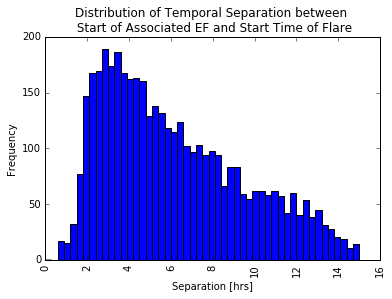

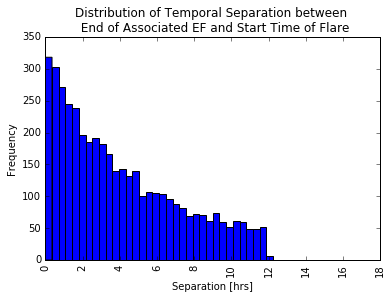

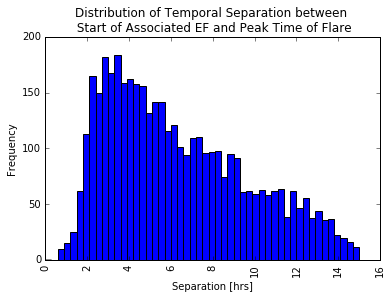

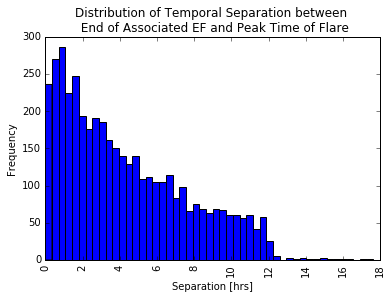

In [26]:

ef_start = np.array(map(parse_time, ef_flares['ef_starttime']))
ef_end = np.array(map(parse_time, ef_flares['ef_endtime']))
fl_start = np.array(map(parse_time, ef_flares['event_starttime']))
fl_peak = np.array(map(parse_time, ef_flares['event_peaktime']))

time_sep_start = fl_start - ef_start
time_sep_start = map(lambda x: (x.total_seconds())/3600, time_sep_start)
time_sep_end = fl_start - ef_end
time_sep_end = map(lambda x: (x.total_seconds())/3600, time_sep_end)

time_sep_start_p = fl_peak - ef_start
time_sep_start_p = map(lambda x: (x.total_seconds())/3600, time_sep_start_p)
time_sep_end_p = fl_peak - ef_end
time_sep_end_p = map(lambda x: (x.total_seconds())/3600, time_sep_end_p)
# sol = np.array(ef_flares['SOL_standard'])
# for i, elem in enumerate(time_sep):
#     if elem > 20:
#         print sol[i]

plt.figure()
_ = plt.hist(time_sep_start, bins = 50, range = (0,15), log = False)
_ = plt.title('Distribution of Temporal Separation between \n Start of Associated EF and Start Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

_ = plt.hist(time_sep_end, bins = 50, range = (0,18), log = False)
_ = plt.title('Distribution of Temporal Separation between \n End of Associated EF and Start Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

plt.figure()
_ = plt.hist(time_sep_start_p, bins = 50, range = (0,15), log = False)
_ = plt.title('Distribution of Temporal Separation between \n Start of Associated EF and Peak Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

plt.figure()
_ = plt.hist(time_sep_end_p, bins = 50, range = (0,18), log = False)
_ = plt.title('Distribution of Temporal Separation between \n End of Associated EF and Peak Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

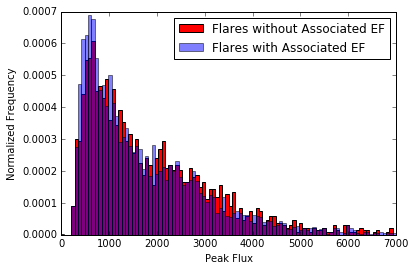

In [13]:
no_ef_flares = flare_set.ix[flare_set['is_ef']==0]
ef_flares = flare_set.ix[flare_set['is_ef']==1]
peak_flux_ef = ef_flares['sum_peakflux']
peak_flux_no_ef = no_ef_flares['sum_peakflux']
_ = plt.hist(peak_flux_no_ef, color = 'r', bins = 100, normed = True, label = 'Flares without Associated EF',
            range = (0,7000))
_ = plt.hist(peak_flux_ef, bins = 100, normed = True, label = 'Flares with Associated EF', alpha = 0.5, range = (0,7000))

plt.legend()
_ = plt.xlabel('Peak Flux')
_ = plt.ylabel('Normalized Frequency')


In [18]:

goes = pd.read_csv('flare_search_starting_w_goes2011-03-01_2016-06-01_12_60_100.csv', delimiter = ',', header = 0)
no_ef_goes = goes.ix[goes['is_ef']==0]
ef_goes = goes.ix[goes['is_ef']==1]

print no_ef_goes.shape[0]
print ef_goes.shape[0]
print goes.shape[0]

683
2300
2983


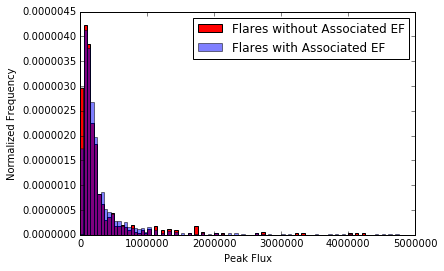

In [22]:

peak_flux_ef = ef_goes['fl_peakflux_goes']
peak_flux_no_ef = no_ef_goes['fl_peakflux_goes']
_ = plt.hist(peak_flux_no_ef, color = 'r', bins = 100, normed = True, label = 'Flares without Associated EF', range = (0, 5000000))
_ = plt.hist(peak_flux_ef, bins = 100, normed = True, label = 'Flares with Associated EF', alpha = 0.5, range = (0, 5000000))

plt.legend()
_ = plt.xlabel('Peak Flux')
_ = plt.ylabel('Normalized Frequency')

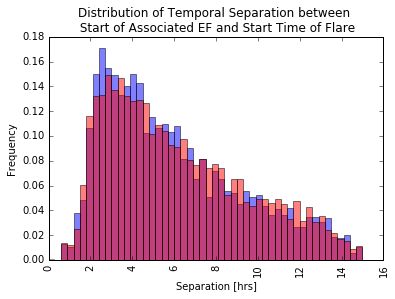

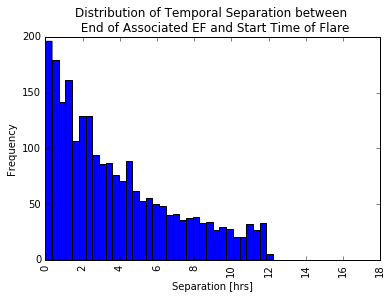

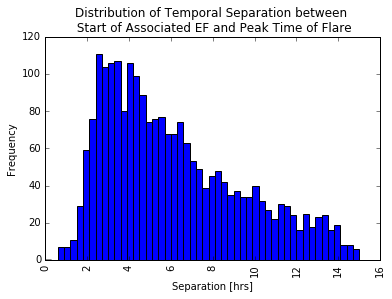

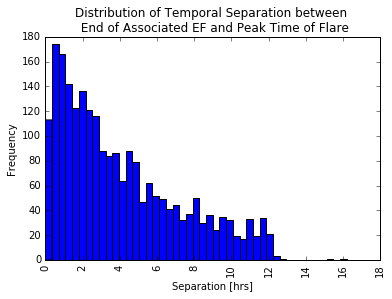

In [27]:

ef_startg = np.array(map(parse_time, ef_goes['ef_starttime']))
ef_endg = np.array(map(parse_time, ef_goes['ef_endtime']))
fl_startg = np.array(map(parse_time, ef_goes['event_starttime']))
fl_peakg = np.array(map(parse_time, ef_goes['event_peaktime']))

time_sep_startg = fl_startg - ef_startg
time_sep_startg = map(lambda x: (x.total_seconds())/3600, time_sep_startg)
time_sep_endg = fl_startg - ef_endg
time_sep_endg = map(lambda x: (x.total_seconds())/3600, time_sep_endg)

time_sep_start_pg = fl_peakg - ef_startg
time_sep_start_pg = map(lambda x: (x.total_seconds())/3600, time_sep_start_pg)
time_sep_end_pg = fl_peakg - ef_endg
time_sep_end_pg = map(lambda x: (x.total_seconds())/3600, time_sep_end_pg)
# sol = np.array(ef_flares['SOL_standard'])
# for i, elem in enumerate(time_sep):
#     if elem > 20:
#         print sol[i]

plt.figure()
_ = plt.hist(time_sep_startg, bins = 50, range = (0,15), log = False, normed = True, alpha =0.5)
_ = plt.hist(time_sep_start, bins = 50, range = (0,15), log = False, normed = True, alpha = 0.5, color = 'r')
_ = plt.title('Distribution of Temporal Separation between \n Start of Associated EF and Start Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

_ = plt.hist(time_sep_endg, bins = 50, range = (0,18), log = False, normed = True, alpha =0.5)
_ = plt.title('Distribution of Temporal Separation between \n End of Associated EF and Start Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

plt.figure()
_ = plt.hist(time_sep_start_pg, bins = 50, range = (0,15), log = False)
_ = plt.title('Distribution of Temporal Separation between \n Start of Associated EF and Peak Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

plt.figure()
_ = plt.hist(time_sep_end_pg, bins = 50, range = (0,18), log = False)
_ = plt.title('Distribution of Temporal Separation between \n End of Associated EF and Peak Time of Flare')
_ = plt.ylabel('Frequency')
_ = plt.xlabel('Separation [hrs]')
_ = plt.xticks(rotation=90)

plt.show()

In [28]:
percentile = [10, 25, 33, 50, 55, 60, 66, 75, 90]
np.percentile(ef_goes['ef_association_strength'], percentile)

array([  4.31406263e-01,   2.03773953e+00,   4.00618028e+00,
         1.68408214e+01,   2.64689621e+01,   4.66145385e+01,
         9.81645942e+01,   3.88716951e+02,   1.14467767e+04])

In [30]:
ef_association_60th_percentile = ef_goes.ix[ef_goes['ef_association_strength']>= 46]

In [ ]:
abs_sumflux_ef = ef_association_60th_percentile['ef_sumpossignedflux'] -ef_association_60th_percentile['ef_sumnegsignedflux']
peak_flux_ef = ef_association_60th_percentile['sum_peakflux'] + ef_association_60th_percentile['fl_peakflux_goes']
maxmagfieldstrength = ef_association_60th_percentile['maxmagfieldstrength']

pospeakfluxonsetrate = ef_association_60th_percentile['ef_pospeakfluxonsetrate']

area_atdiskcenter = ef_association_60th_percentile['area_atdiskcenter']

peak_flux_ef_log = np.log(peak_flux_ef)

plt.scatter(peak_flux_ef, area_atdiskcenter, alpha = 0.25)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel(r'Area at Disk Center [$km^2$]')
plt.title('Flares with Associated EF \n EF Area at Disk Center vs Flare Peak Flux')
plt.semilogx()

plt.show()

print linregress(peak_flux_ef_log, area_atdiskcenter)



plt.scatter(peak_flux_ef, maxmagfieldstrength, alpha = 0.25)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Maximum B Field Strength [G]')
plt.title('Flares with Associated EF \n Max EF B Field Strength vs Flare Peak Flux')
plt.semilogx()

plt.show()
print linregress(peak_flux_ef_log, maxmagfieldstrength)


_ = plt.scatter(peak_flux_ef, abs_sumflux_ef, alpha = 0.25)
plt.ylim(-100, 2000)
plt.xlim(100, 10000)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Absolute Value of Summed Flux [emx]')
plt.title('Flares with Associated EF \n Absoluted Value of EF Summed Flux vs Flare Peak Flux')
# plt.semilogx()

plt.show()

print linregress(peak_flux_ef_log, abs_sumflux_ef)





_ = plt.scatter(peak_flux_ef, pospeakfluxonsetrate, alpha = 0.25)
_ = plt.xlabel('Peak Flux [erg/cm/cm/s]')
_ = plt.ylabel('Positive Peak Flux Onset Rate [emx/hr]')
_ = plt.title('Flares with Associated EF \n EF Positive Peak Flux Onset Rate vs Flare Peak Flux')
plt.ylim(-100, 2000)
plt.semilogx()

plt.show()

print linregress(peak_flux_ef_log, pospeakfluxonsetrate)

In [28]:
x = []
y = [0,1,2,3,4]
np.vstack((x,y))

ValueError: all the input array dimensions except for the concatenation axis must match exactly